In [1]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans
import os
import torch
import numpy as np
from collections import defaultdict
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

In [ ]:
emb_dir = "../embeddings/merged_embeddings.npy"
embeddings = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings.shape}")

emb_dir = "../embeddings/local_embeddings.npy"
embeddings_local = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings_local.shape}")


emb_dir = "../embeddings/global_embeddings.npy"
embeddings_glob = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings_glob.shape}")


name_dir = "../embeddings/names_embeddings.npy"
if not os.path.exists(name_dir):
    raise FileNotFoundError(f"Embeddings file not found at {name_dir}")
names = np.load(name_dir)
print(f"Loaded names of shape: {names.shape}")
artist_arr = deepcopy(names)

for i in range(names.shape[0]):
    artist_arr[i] = artist_arr[i].split("_")[0]

painters = np.unique(artist_arr)

Loaded embeddings of shape: (8739, 1344)
Loaded embeddings of shape: (8739, 320)
Loaded embeddings of shape: (8739, 1024)
Loaded names of shape: (8739,)


In [ ]:
def painter_probabilities(artist, names, painting_probs):
    painter_probs = np.zeros(painting_probs.shape[1])
    cou = 0
    for i in range(len(names)):
        if names[i] == artist:
            painter_probs += painting_probs[i]
            cou += 1
    return painter_probs/cou

def matrix_prob(painting_prob, painters):
    painter_prob = []
    for painter in painters:
        painter_prob.append(painter_probabilities(painter, artist_arr, painting_prob))
    return np.array(painter_prob)   

In [ ]:
bgmm_glob = BayesianGaussianMixture(n_components=60, covariance_type='full')
bgmm_glob.fit(embeddings_glob)
painting_probs = bgmm_glob.predict_proba(embeddings_glob)


In [49]:
print(f"Painting probabilities shape: {painting_probs.shape}")

Painting probabilities shape: (8739, 20)


In [50]:
painter_prob = matrix_prob(painting_probs, artist_arr)
print(f"Painter probabilities shape: {painter_prob.shape}")

Painter probabilities shape: (8739, 20)


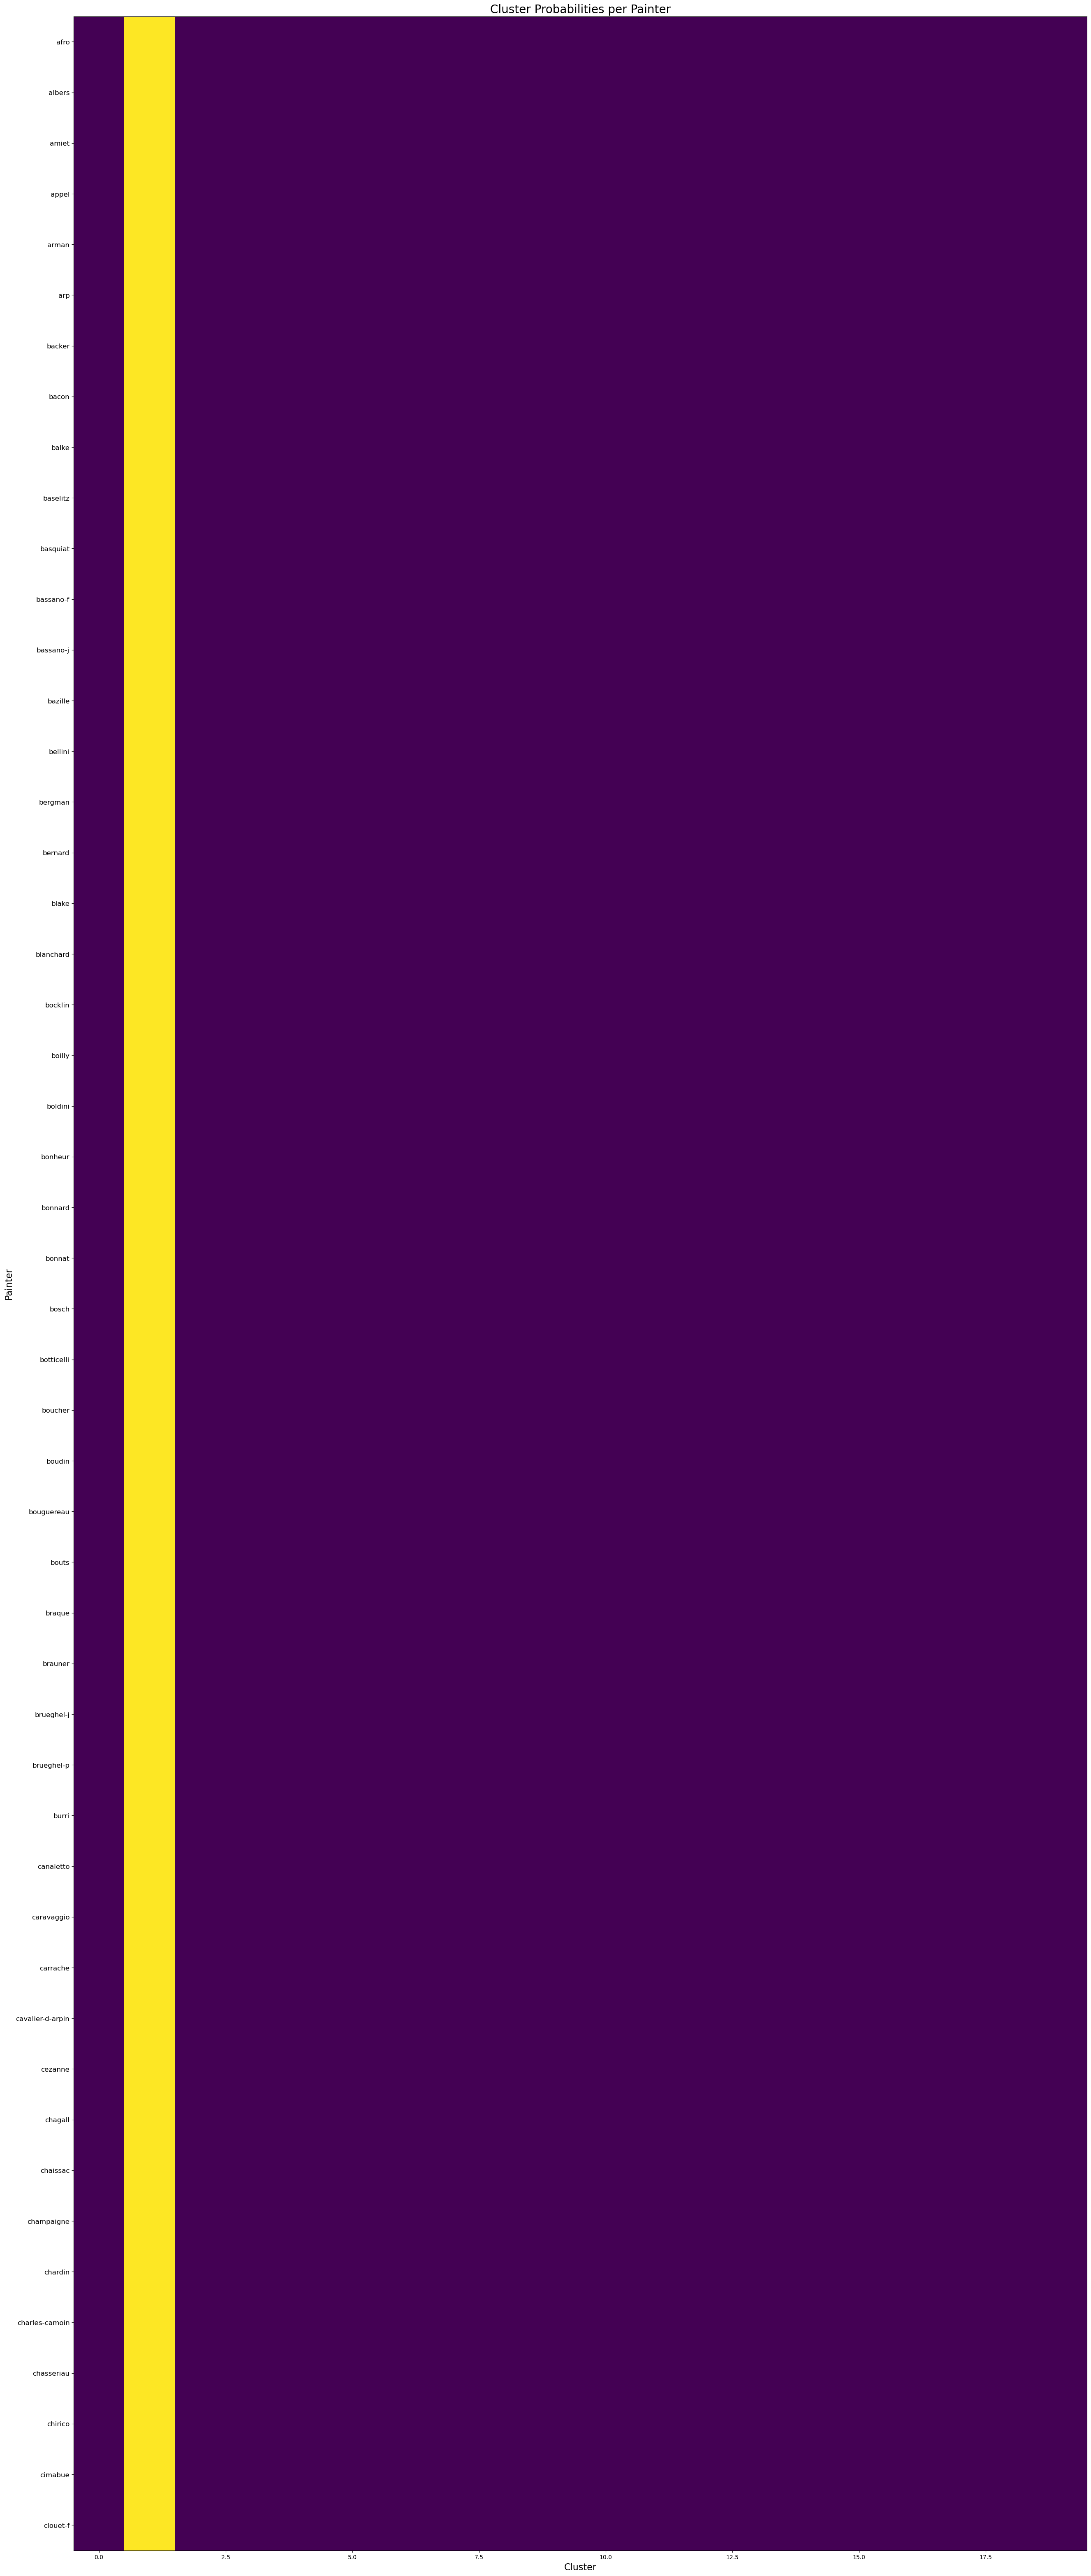

In [51]:
painters=painters[:50]
plt.figure(figsize=(40, 80))
plt.yticks(ticks=np.arange(len(painters)), labels=painters, fontsize=12)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Painter", fontsize=16)
plt.title("Cluster Probabilities per Painter", fontsize=20)
plt.imshow(painter_prob[:50])
plt.show()

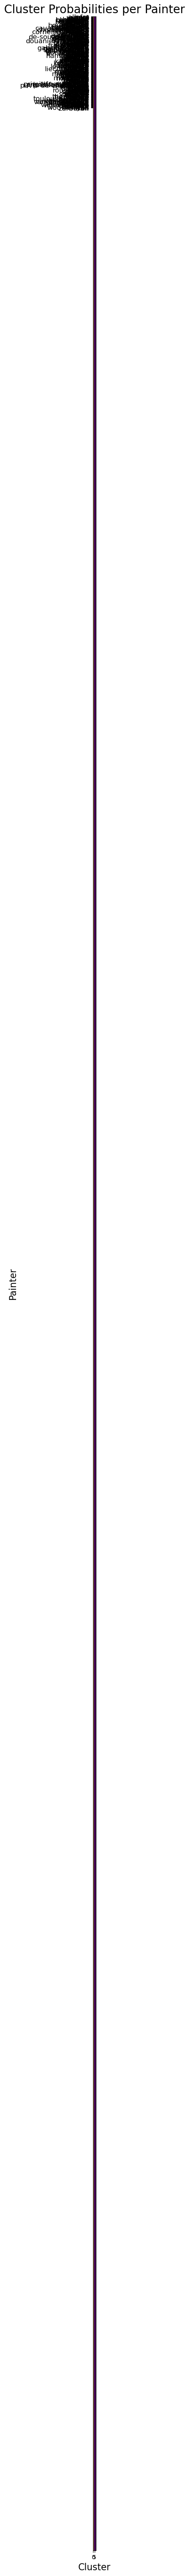

In [45]:
plt.figure(figsize=(40, 80))
plt.yticks(ticks=np.arange(len(painters)), labels=painters, fontsize=12)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Painter", fontsize=16)
plt.title("Cluster Probabilities per Painter", fontsize=20)
plt.imshow(painter_prob)
plt.show()